# LOAD THE DATA


In [241]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the datasets
ratings_df = pd.read_csv('../Dataset/ratings.csv')
movies_df = pd.read_csv('../Dataset/movies.csv')
tags_df = pd.read_csv('../Dataset/tags.csv')
links_df = pd.read_csv('../Dataset/links.csv')



# EDA

## Size of datasets

In [242]:
# Print the size of each dataset
print("Size of Ratings Dataset:", ratings_df.shape)
print("Size of Movies Dataset:", movies_df.shape)
print("Size of Tags Dataset:", tags_df.shape)
print("Size of Links Dataset:", links_df.shape)

Size of Ratings Dataset: (100852, 4)
Size of Movies Dataset: (9742, 3)
Size of Tags Dataset: (3683, 4)
Size of Links Dataset: (9742, 3)


In [243]:
# Number of unique users in the ratings dataset
unique_users = ratings_df['userId'].nunique()
print(f"Number of unique users: {unique_users}")

Number of unique users: 610


In [244]:
# Count the number of ratings per user
ratings_per_user = ratings_df.groupby('userId').size()

# Sort the counts in descending order
sorted_ratings_per_user = ratings_per_user.sort_values(ascending=False)

# Get the maximum number of ratings given by a user
max_ratings = sorted_ratings_per_user.iloc[0]
print(f"Maximum number of ratings given by a user: {max_ratings}")

# Get the top 10 users with the most ratings
top_10_users = sorted_ratings_per_user.head(10)
print("Top 10 users with the most ratings:")
print(top_10_users)

Maximum number of ratings given by a user: 2698
Top 10 users with the most ratings:
userId
414    2698
599    2478
474    2108
448    1864
274    1346
610    1302
68     1260
380    1218
606    1115
288    1055
dtype: int64


## Head of dataframe

In [245]:

# Inspecting the first few rows of each dataset
print("Ratings DataFrame:")
print(ratings_df.head())

print("\nMovies DataFrame:")
print(movies_df.head())

print("\nTags DataFrame:")
print(tags_df.head())

print("\nLinks DataFrame:")
print(links_df.head())



Ratings DataFrame:
   userId  movieId  rating    timestamp
0       1        1     4.0  964982703.0
1       1        3     4.0  964981247.0
2       1        6     4.0  964982224.0
3       1       47     5.0  964983815.0
4       1       50     5.0  964982931.0

Movies DataFrame:
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  

Tags DataFrame:
   userId  movieId              tag   timestamp
0       2    60756            funny  1445714994
1       2    6

## Statistical summary

In [246]:
# Summary statistics for numerical data
print("\nRatings DataFrame Summary:")
print(ratings_df.describe())

print("\nMovies DataFrame Summary:")
print(movies_df.describe())

print("\nTags DataFrame Summary:")
print(tags_df.describe())

print("\nLinks DataFrame Summary:")
print(links_df.describe())


Ratings DataFrame Summary:
              userId       movieId         rating     timestamp
count  100852.000000  1.008520e+05  100851.000000  1.008360e+05
mean      326.076092  1.944411e+04       3.501582  1.205946e+09
std       182.649721  3.572202e+04       1.042631  2.162610e+08
min         1.000000  1.000000e+00       0.500000  8.281246e+08
25%       177.000000  1.199000e+03       3.000000  1.019124e+09
50%       325.000000  2.991000e+03       3.500000  1.186087e+09
75%       477.000000  8.119000e+03       4.000000  1.435994e+09
max       610.000000  1.197306e+06       5.000000  1.537799e+09

Movies DataFrame Summary:
             movieId
count    9742.000000
mean    42200.353623
std     52160.494854
min         1.000000
25%      3248.250000
50%      7300.000000
75%     76232.000000
max    193609.000000

Tags DataFrame Summary:
            userId        movieId     timestamp
count  3683.000000    3683.000000  3.683000e+03
mean    431.149335   27252.013576  1.320032e+09
std     158

## Missing values

In [247]:
# Check for missing values in all dataframes
print("\nMissing values in Ratings:")
print(ratings_df.isnull().sum())

print("\nMissing values in Movies:")
print(movies_df.isnull().sum())

print("\nMissing values in Tags:")
print(tags_df.isnull().sum())

print("\nMissing values in Links:")
print(links_df.isnull().sum())



Missing values in Ratings:
userId        0
movieId       0
rating        1
timestamp    16
dtype: int64

Missing values in Movies:
movieId    0
title      0
genres     0
dtype: int64

Missing values in Tags:
userId       0
movieId      0
tag          0
timestamp    0
dtype: int64

Missing values in Links:
movieId    0
imdbId     0
tmdbId     8
dtype: int64


## Data Distribution


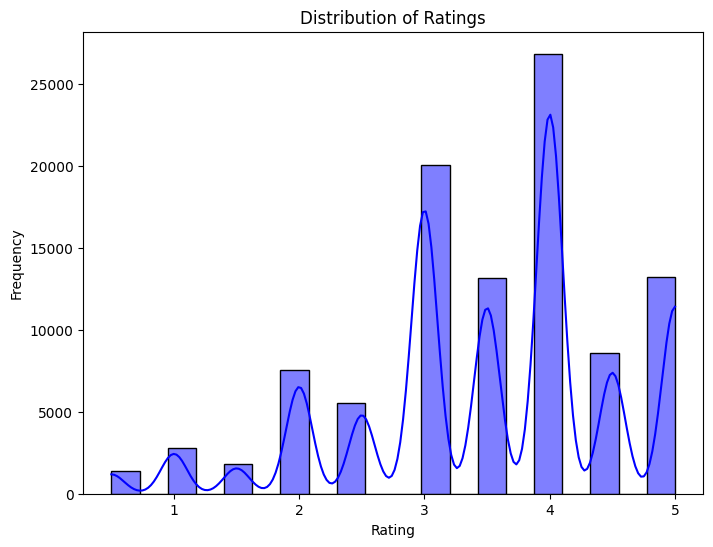

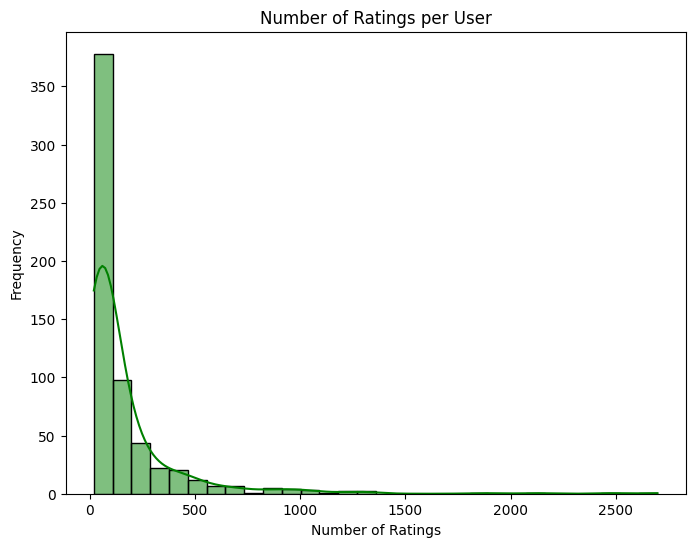

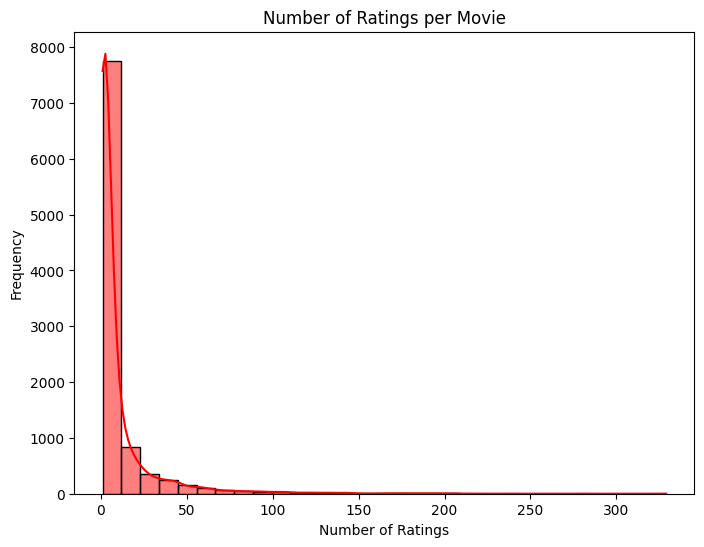

In [248]:
# Distribution of ratings
plt.figure(figsize=(8,6))
sns.histplot(ratings_df['rating'], bins=20, kde=True, color='blue')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

# Number of ratings per user
ratings_per_user = ratings_df.groupby('userId').size()
plt.figure(figsize=(8,6))
sns.histplot(ratings_per_user, bins=30, kde=True, color='green')
plt.title('Number of Ratings per User')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()

# Number of ratings per movie
ratings_per_movie = ratings_df.groupby('movieId').size()
plt.figure(figsize=(8,6))
sns.histplot(ratings_per_movie, bins=30, kde=True, color='red')
plt.title('Number of Ratings per Movie')
plt.xlabel('Number of Ratings')
plt.ylabel('Frequency')
plt.show()


## Distribution of Movie genres

C:\Users\Akash Bahri\AppData\Local\Temp\ipykernel_18876\2155824422.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genres.index, y=genres.values, palette='viridis')


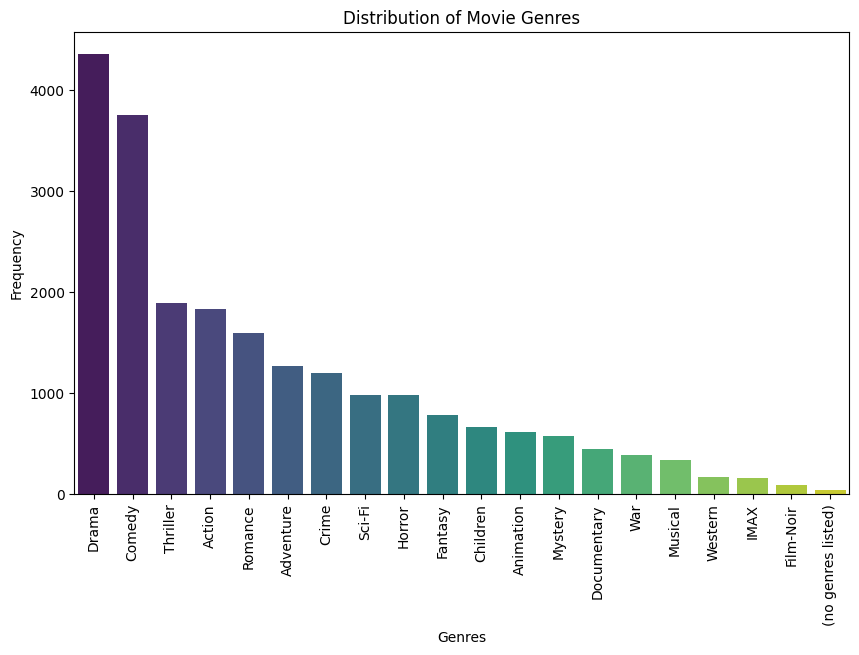

In [249]:
# Movie genre distribution (one-hot encoding for genres)
genres = movies_df['genres'].str.split('|', expand=True).stack().value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=genres.index, y=genres.values, palette='viridis')
plt.title('Distribution of Movie Genres')
plt.xlabel('Genres')
plt.ylabel('Frequency')
plt.xticks(rotation=90)
plt.show()


# DATA CLEANING

## Handle missing values

In [250]:

# If any rows in 'ratings.csv' have missing ratings, drop them
ratings_df.dropna(subset=['rating'], inplace=True)

# Check if there are duplicates in the ratings data
ratings_df.drop_duplicates(subset=['userId', 'movieId'], inplace=True)

# Check for missing values in 'movies.csv' and fill them if necessary
movies_df['genres'].fillna('Unknown', inplace=True)

# Handle duplicates in movies data (if any)
movies_df.drop_duplicates(subset=['movieId'], inplace=True)

# Check for missing values in 'tags.csv'
tags_df.dropna(subset=['tag'], inplace=True)

# Handle duplicates in tags data (if any)
tags_df.drop_duplicates(subset=['userId', 'movieId', 'tag'], inplace=True)


## Timestamp Normalization and Genre Processing

In [251]:

# Normalize the timestamp in ratings and tags
ratings_df['timestamp'] = pd.to_datetime(ratings_df['timestamp'], unit='s')
tags_df['timestamp'] = pd.to_datetime(tags_df['timestamp'], unit='s')

# Split year from movie titles in movies.csv
movies_df['year'] = movies_df['title'].str.extract(r'\((\d{4})\)')
movies_df['title'] = movies_df['title'].str.replace(r'\(\d{4}\)', '').str.strip()

# Split genres into individual columns
genres_split = movies_df['genres'].str.get_dummies('|')
movies_df = pd.concat([movies_df, genres_split], axis=1)


## Handling Rows with No Genres Listed

In [252]:
# Count the number of movies with "(no genres listed)"
no_genres_count = movies_df[movies_df['genres'] == '(no genres listed)'].shape[0]
print("Count of '(no genres listed)':", no_genres_count)

Count of '(no genres listed)': 34


In [253]:
# Display rows with "(no genres listed)" in the genres column
no_genres_rows = movies_df[movies_df['genres'] == '(no genres listed)']
print(no_genres_rows)

      movieId                                              title  \
8517   114335                                  La cravate (1957)   
8684   122888                                     Ben-hur (2016)   
8687   122896  Pirates of the Caribbean: Dead Men Tell No Tal...   
8782   129250                                  Superfast! (2015)   
8836   132084                                Let It Be Me (1995)   
8902   134861               Trevor Noah: African American (2013)   
9033   141131                                   Guardians (2016)   
9053   141866                                  Green Room (2015)   
9070   142456                     The Brand New Testament (2015)   
9091   143410                                         Hyena Road   
9138   147250  The Adventures of Sherlock Holmes and Doctor W...   
9178   149330                          A Cosmic Christmas (1977)   
9217   152037                                 Grease Live (2016)   
9248   155589                             Noin 7

In [254]:
# Replace "(no genres listed)" with "Unknown"
movies_df['genres'] = movies_df['genres'].replace('(no genres listed)', 'Unknown')
print("Replaced '(no genres listed)' with 'Unknown'.")

Replaced '(no genres listed)' with 'Unknown'.


In [255]:
# Count the number of movies with "(no genres listed)"
no_genres_count = movies_df[movies_df['genres'] == '(no genres listed)'].shape[0]
print("Count of '(no genres listed)':", no_genres_count)

Count of '(no genres listed)': 0


In [256]:
# Regenerate the one-hot encoded columns for genres
genres_split = movies_df['genres'].str.get_dummies('|')

# Update the movies_df with the new genres_split
movies_df = pd.concat([movies_df, genres_split], axis=1)

genres_split.describe()

,Action,Adventure,Animation,Children,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,IMAX,Musical,Mystery,Romance,Sci-Fi,Thriller,Unknown,War,Western
count,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000,9742.000000
mean,0.187641,0.129645,0.062718,0.068158,0.385547,0.123075,0.045165,0.447649,0.079963,0.008930,0.100390,0.016218,0.034285,0.058817,0.163827,0.100595,0.194416,0.003490,0.039212,0.017142
std,0.390445,0.335930,0.242468,0.252031,0.486749,0.328541,0.207677,0.497277,0.271250,0.094083,0.300535,0.126321,0.181968,0.235295,0.370137,0.300808,0.395771,0.058976,0.194108,0.129808
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [257]:
genres_split.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 20 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Action       9742 non-null   int64
 1   Adventure    9742 non-null   int64
 2   Animation    9742 non-null   int64
 3   Children     9742 non-null   int64
 4   Comedy       9742 non-null   int64
 5   Crime        9742 non-null   int64
 6   Documentary  9742 non-null   int64
 7   Drama        9742 non-null   int64
 8   Fantasy      9742 non-null   int64
 9   Film-Noir    9742 non-null   int64
 10  Horror       9742 non-null   int64
 11  IMAX         9742 non-null   int64
 12  Musical      9742 non-null   int64
 13  Mystery      9742 non-null   int64
 14  Romance      9742 non-null   int64
 15  Sci-Fi       9742 non-null   int64
 16  Thriller     9742 non-null   int64
 17  Unknown      9742 non-null   int64
 18  War          9742 non-null   int64
 19  Western      9742 non-null   int64
dtypes: int64

# DATA PREPROCESSING

In [258]:
# Create the user-item interaction matrix (ratings matrix)
user_movie_matrix = ratings_df.pivot_table(index='userId', columns='movieId', values='rating')

# Handle missing values in the matrix (optional: you can use a method like fillna(0) or imputation)
user_movie_matrix = user_movie_matrix.fillna(0)

# Splitting the data into train and test sets (80% train, 20% test)
from sklearn.model_selection import train_test_split
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create a function to calculate item-item similarity using Cosine Similarity
from sklearn.metrics.pairwise import cosine_similarity

# Calculate item-item similarity matrix
item_similarity = cosine_similarity(user_movie_matrix.T)

# Create a DataFrame for item-item similarity
item_similarity_df = pd.DataFrame(item_similarity, index=user_movie_matrix.columns, columns=user_movie_matrix.columns)

# Function to recommend top N similar items
def recommend_items(movie_id, top_n=10):
    similar_scores = item_similarity_df[movie_id].sort_values(ascending=False)
    top_similar_movies = similar_scores.iloc[1:top_n+1].index
    return top_similar_movies



## Example: Get top 10 similar movies to movieId 1

In [259]:

top_10_similar_movies = recommend_items(1, top_n=10)
print(f"Top 10 similar movies to movieId 1: {top_10_similar_movies}")


Top 10 similar movies to movieId 1: Index([3114, 480, 780, 260, 356, 364, 1210, 648, 1265, 1270], dtype='int64', name='movieId')


# Item-Item Collaborative Filtering

## Build the Model

In [260]:
# Item-Item Collaborative Filtering based on Cosine Similarity
# Now you can build the recommendation system by recommending items for a user

def get_user_recommendations(user_id, top_n=10):
    # Get the movies the user has already rated
    rated_movies = ratings_df[ratings_df['userId'] == user_id]['movieId'].values
    
    # Get the movies the user hasn't rated
    unrated_movies = user_movie_matrix.columns[~user_movie_matrix.columns.isin(rated_movies)]
    
    # Calculate the weighted sum of similarities for each unrated movie
    movie_scores = {}
    for movie in unrated_movies:
        similar_movies = recommend_items(movie)
        score = sum([item_similarity_df[movie].loc[sim_movie] for sim_movie in similar_movies])
        movie_scores[movie] = score
    
    # Sort the movies by score and return the top N
    recommended_movies = sorted(movie_scores, key=movie_scores.get, reverse=True)[:top_n]
    return recommended_movies

# Example: Get top 10 recommendations for user 1
user_recommendations = get_user_recommendations(1, top_n=10)
print(f"Top 10 recommended movies for user 1: {user_recommendations}")


Top 10 recommended movies for user 1: [77, 96, 108, 149, 189, 201, 202, 219, 243, 254]


In [261]:
item_similarity_df.shape

(9725, 9725)

In [262]:
user_movie_matrix.shape

(610, 9725)

## Evaluate the model

In [263]:
from sklearn.model_selection import train_test_split

# Split ratings into train and test
train_df, test_df = train_test_split(ratings_df, test_size=0.2, random_state=42)

# Create user-item matrix using train data
train_matrix = train_df.pivot_table(index='userId', columns='movieId', values='rating').fillna(0)


In [264]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 80675 entries, 63260 to 15795
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   userId     80675 non-null  int64         
 1   movieId    80675 non-null  int64         
 2   rating     80675 non-null  float64       
 3   timestamp  80669 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 3.1 MB


In [265]:
from sklearn.metrics.pairwise import cosine_similarity

# Compute item similarity from training matrix
item_similarity = cosine_similarity(train_matrix.T)
item_similarity_df2 = pd.DataFrame(item_similarity, 
                                  index=train_matrix.columns, 
                                  columns=train_matrix.columns)


In [266]:
item_similarity_df2.shape

(9020, 9020)

In [267]:
def predict_rating(user_id, movie_id, k=5):
    if movie_id not in item_similarity_df2.columns or user_id not in train_matrix.index:
        return np.nan

    # Get ratings of this user
    user_ratings = train_matrix.loc[user_id]
    rated_movies = user_ratings[user_ratings > 0]

    # Get similarity scores for the target movie
    similar_scores = item_similarity_df2[movie_id]

    # Filter to only similar movies the user has rated
    similar_rated = similar_scores[rated_movies.index]

    # Take top K similar rated movies
    top_k = similar_rated.sort_values(ascending=False).head(k)

    # Weighted average
    weighted_sum = np.dot(user_ratings[top_k.index], top_k.values)
    sum_of_weights = np.sum(np.abs(top_k.values))
    
    if sum_of_weights == 0:
        return np.nan

    return weighted_sum / sum_of_weights


In [268]:
test_df = test_df.copy()
test_df['rating_pred'] = test_df.apply(
    lambda x: predict_rating(x['userId'], x['movieId'], k=5), axis=1
)

# Drop rows where prediction couldn't be made
test_df.dropna(subset=['rating_pred'], inplace=True)


In [269]:
from sklearn.metrics import mean_squared_error
from math import sqrt

rmse = sqrt(mean_squared_error(test_df['rating'], test_df['rating_pred']))
print(f'RMSE: {rmse:.4f}')


RMSE: 0.8934


In [270]:
def precision_recall_at_k(user_id, k=10, threshold=4.0):
    # Get movies this user rated in test set
    user_actual = test_df[test_df['userId'] == user_id]
    if user_actual.empty:
        return None, None

    # Relevant items: movies rated >= threshold
    relevant = user_actual[user_actual['rating'] >= threshold]['movieId'].tolist()

    # Top K predicted highest rated items for this user
    top_k_preds = user_actual.sort_values('rating_pred', ascending=False).head(k)
    recommended = top_k_preds['movieId'].tolist()

    # Hits
    hits = len(set(recommended) & set(relevant))

    precision = hits / k
    recall = hits / len(relevant) if relevant else 0

    return precision, recall


In [271]:
precisions = []
recalls = []

user_ids = test_df['userId'].unique()

for uid in user_ids:
    p, r = precision_recall_at_k(uid, k=10)
    if p is not None:
        precisions.append(p)
        recalls.append(r)

avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)

print(f'Precision@10: {avg_precision:.4f}')
print(f'Recall@10: {avg_recall:.4f}')


Precision@10: 0.5645
Recall@10: 0.6703


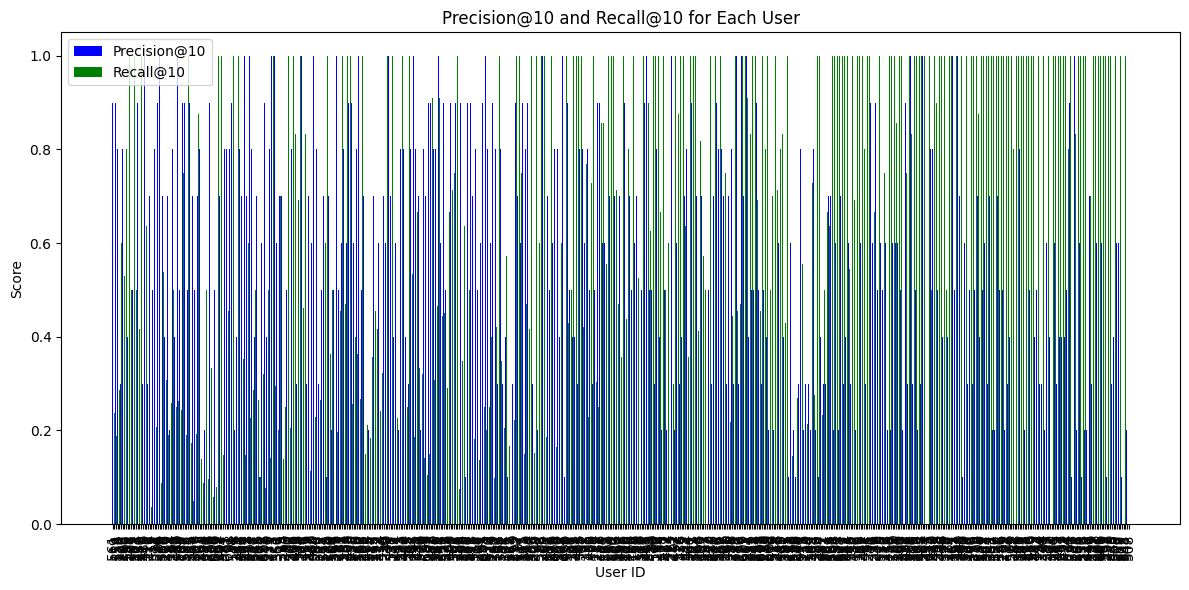

In [272]:
import matplotlib.pyplot as plt
import numpy as np

# Assuming `precisions` and `recalls` are already calculated
user_ids = test_df['userId'].unique()

# Bar plot for Precision and Recall
x = np.arange(len(user_ids))  # User indices
width = 0.35  # Bar width

fig, ax = plt.subplots(figsize=(12, 6))
precision_bars = ax.bar(x - width/2, precisions, width, label='Precision@10', color='blue')
recall_bars = ax.bar(x + width/2, recalls, width, label='Recall@10', color='green')

# Add labels, title, and legend
ax.set_xlabel('User ID')
ax.set_ylabel('Score')
ax.set_title('Precision@10 and Recall@10 for Each User')
ax.set_xticks(x)
ax.set_xticklabels(user_ids, rotation=90)
ax.legend()

plt.tight_layout()
plt.show()

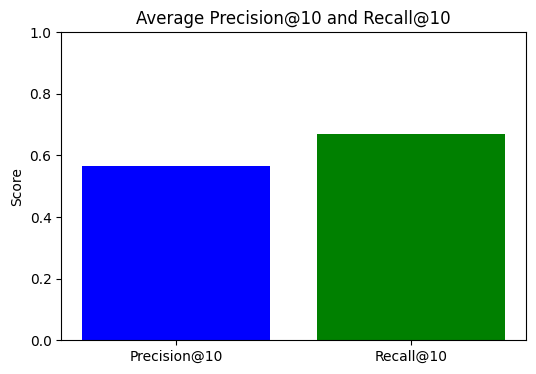

In [273]:
# Bar plot for average Precision and Recall
metrics = ['Precision@10', 'Recall@10']
scores = [avg_precision, avg_recall]

plt.figure(figsize=(6, 4))
plt.bar(metrics, scores, color=['blue', 'green'])
plt.title('Average Precision@10 and Recall@10')
plt.ylabel('Score')
plt.ylim(0, 1)  # Assuming scores are between 0 and 1
plt.show()

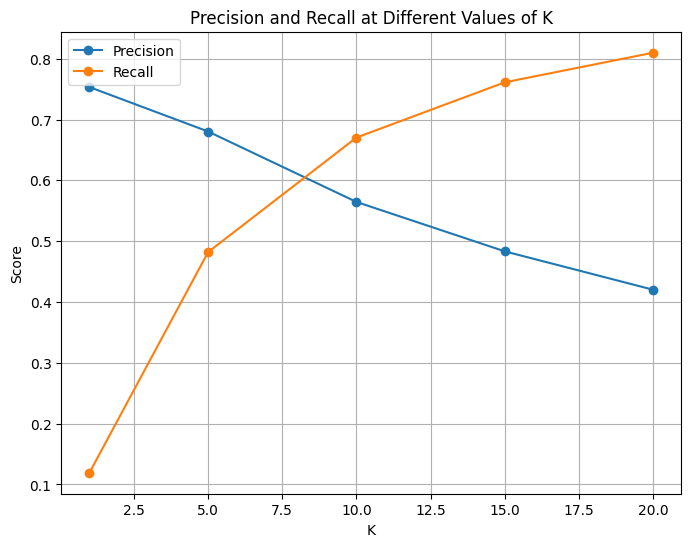

In [274]:
# Example: Precision and Recall at different values of K
ks = [1, 5, 10, 15, 20]
precision_at_k = []
recall_at_k = []

for k in ks:
    precisions = []
    recalls = []
    for uid in user_ids:
        p, r = precision_recall_at_k(uid, k=k)
        if p is not None:
            precisions.append(p)
            recalls.append(r)
    precision_at_k.append(np.mean(precisions))
    recall_at_k.append(np.mean(recalls))

# Plot Precision-Recall Curve
plt.figure(figsize=(8, 6))
plt.plot(ks, precision_at_k, marker='o', label='Precision')
plt.plot(ks, recall_at_k, marker='o', label='Recall')
plt.title('Precision and Recall at Different Values of K')
plt.xlabel('K')
plt.ylabel('Score')
plt.legend()
plt.grid()
plt.show()

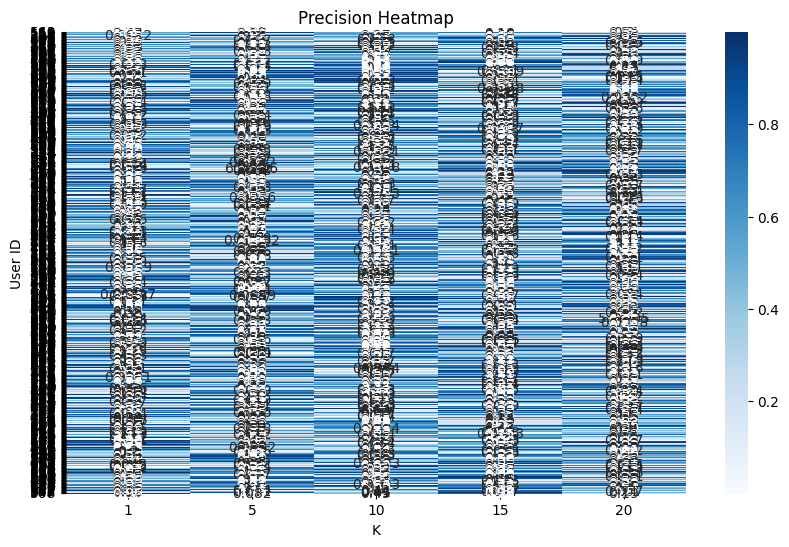

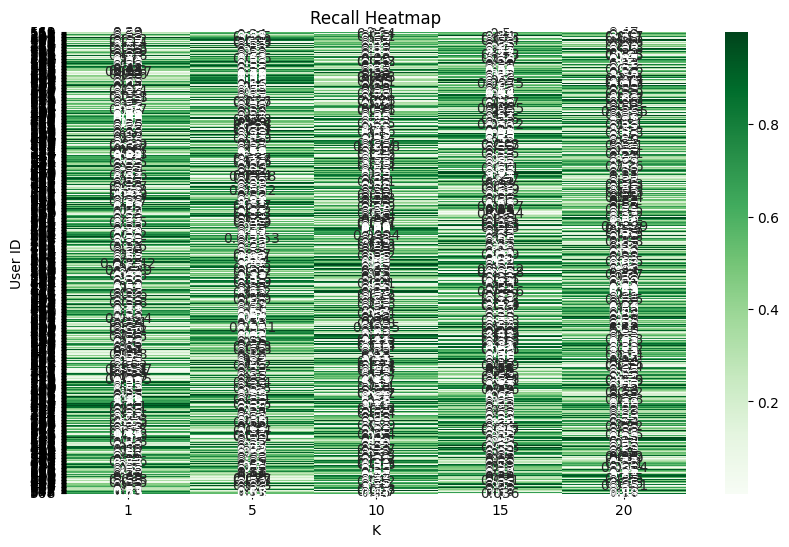

In [275]:
import seaborn as sns

# Example: Precision and Recall for multiple users at different K
precision_matrix = np.random.rand(len(user_ids), len(ks))  # Replace with actual precision values
recall_matrix = np.random.rand(len(user_ids), len(ks))  # Replace with actual recall values

# Heatmap for Precision
plt.figure(figsize=(10, 6))
sns.heatmap(precision_matrix, annot=True, xticklabels=ks, yticklabels=user_ids, cmap='Blues')
plt.title('Precision Heatmap')
plt.xlabel('K')
plt.ylabel('User ID')
plt.show()

# Heatmap for Recall
plt.figure(figsize=(10, 6))
sns.heatmap(recall_matrix, annot=True, xticklabels=ks, yticklabels=user_ids, cmap='Greens')
plt.title('Recall Heatmap')
plt.xlabel('K')
plt.ylabel('User ID')
plt.show()

## Export

In [276]:
import pickle

# Save the user-item matrix and item similarity matrix as Pickle files
with open('user_item_matrix.pkl', 'wb') as f:
    pickle.dump(user_movie_matrix, f)

with open('item_similarity_matrix.pkl', 'wb') as f:
    pickle.dump(item_similarity_df, f)


# GHRS

## model

In [277]:
import numpy as np
import pandas as pd
import scipy
import matplotlib as plt
import networkx as nx
import itertools
import collections
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder


def convert_categorical(df_X, _X):
    values = np.array(df_X[_X])
    # integer encode
    label_encoder = LabelEncoder()
    integer_encoded = label_encoder.fit_transform(values)
    # binary encode
    onehot_encoder = OneHotEncoder(sparse=False)
    integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
    onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
    df_X = df_X.drop(_X, axis=1)
    for j in range(integer_encoded.max() + 1):
        df_X.insert(loc=j + 1, column=str(_X) + str(j + 1), value=onehot_encoded[:, j])
    return df_X


alpha_coefs = [0.005, 0.01, 0.015, 0.02, 0.025, 0.03, 0.035, 0.04, 0.045]

dataPath = '../Dataset/'

df = train_df.rename(columns={
    'userId': 'UID',
    'movieId': 'MID',
    'rating': 'rate',
    'timestamp': 'time'
})


df_user = pd.read_csv(dataPath+'u.user', sep='\\|', engine='python', names=['UID', 'age', 'gender', 'job', 'zip'])

df_user = convert_categorical(df_user, 'job')
df_user = convert_categorical(df_user, 'gender')
df_user['bin'] = pd.cut(df_user['age'], [0, 10, 20, 30, 40, 50, 100], labels=['1', '2', '3', '4', '5', '6'])
df_user['age'] = df_user['bin']

df_user = df_user.drop('bin', axis=1)
df_user = convert_categorical(df_user, 'age')
df_user = df_user.drop('zip', axis=1)

for alpha_coef in alpha_coefs:
    pairs = []
    grouped = df.groupby(['MID', 'rate'])
    for key, group in grouped:
        pairs.extend(list(itertools.combinations(group['UID'], 2)))
    counter = collections.Counter(pairs)
    alpha = alpha_coef * 1682  # param*i_no
    edge_list = map(list, collections.Counter(el for el in counter.elements() if counter[el] >= alpha).keys())
    G = nx.Graph()

    for el in edge_list:
        G.add_edge(el[0], el[1], weight=1)
        G.add_edge(el[0], el[0], weight=1)
        G.add_edge(el[1], el[1], weight=1)

    pr = nx.pagerank(G.to_directed())
    df_user['PR'] = df_user['UID'].map(pr)
    df_user['PR'] /= float(df_user['PR'].max())
    dc = nx.degree_centrality(G)
    df_user['CD'] = df_user['UID'].map(dc)
    df_user['CD'] /= float(df_user['CD'].max())
    cc = nx.closeness_centrality(G)
    df_user['CC'] = df_user['UID'].map(cc)
    df_user['CC'] /= float(df_user['CC'].max())
    bc = nx.betweenness_centrality(G)
    df_user['CB'] = df_user['UID'].map(bc)
    df_user['CB'] /= float(df_user['CB'].max())
    lc = nx.load_centrality(G)
    df_user['LC'] = df_user['UID'].map(lc)
    df_user['LC'] /= float(df_user['LC'].max())
    nd = nx.average_neighbor_degree(G, weight='weight')
    df_user['AND'] = df_user['UID'].map(nd)
    df_user['AND'] /= float(df_user['AND'].max())
    X_train = df_user[df_user.columns[1:]]
    X_train.fillna(0, inplace=True)

    X_train.to_pickle("../data100k/x_train_alpha("+str(alpha_coef)+").pkl")

c:\anaconda3\envs\info6105\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\anaconda3\envs\info6105\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
c:\anaconda3\envs\info6105\lib\site-packages\sklearn\preprocessing\_encoders.py:975: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(
C:\Users\Akash Bahri\AppData\Local\Temp\ipykernel_18876\705715618.py:84: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the ca

In [278]:
X_train = pd.read_pickle("../data100k/x_train_alpha(0.03).pkl")

In [279]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.optimizers import Adam

input_dim = X_train.shape[1]
encoding_dim = 16  # Latent dimension size (tuneable)

# Define autoencoder structure
input_layer = Input(shape=(input_dim,))
encoded = Dense(64, activation='relu')(input_layer)
encoded = Dense(32, activation='relu')(encoded)
latent = Dense(encoding_dim, activation='relu')(encoded)

decoded = Dense(32, activation='relu')(latent)
decoded = Dense(64, activation='relu')(decoded)
output_layer = Dense(input_dim, activation='sigmoid')(decoded)

autoencoder = Model(input_layer, output_layer)
encoder = Model(input_layer, latent)

autoencoder.compile(optimizer=Adam(learning_rate=0.001), loss='mse')

# Train the autoencoder
autoencoder.fit(X_train, X_train, epochs=50, batch_size=64, shuffle=True)


Epoch 1/50
15/15 [==============================] - 1s 2ms/step - loss: 0.2375
Epoch 2/50
15/15 [==============================] - 0s 1ms/step - loss: 0.1721
Epoch 3/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0815
Epoch 4/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0631
Epoch 5/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0599
Epoch 6/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0567
Epoch 7/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0528
Epoch 8/50
15/15 [==============================] - 0s 3ms/step - loss: 0.0494
Epoch 9/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0468
Epoch 10/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0447
Epoch 11/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0422
Epoch 12/50
15/15 [==============================] - 0s 2ms/step - loss: 0.0393
Epoch 13/50
15/15 [==============================

In [280]:
user_embeddings = encoder.predict(X_train)


30/30 [==============================] - 0s 2ms/step


In [281]:
print(user_embeddings.shape)
print(user_embeddings[:5])

(943, 16)
[[ 0.12752166  2.7211618   3.8083293   3.993268    1.5828583  11.8603
   6.28984     4.1852193   1.7830871   0.          1.3486685   4.761796
   5.1015763   0.          5.3806043   8.935358  ]
 [ 0.          0.19881994  4.7188444   0.          5.1639123   5.3399596
   1.9321594   2.6455488   2.4693346   0.          0.          5.5550632
   6.7786803   0.          4.2090144   8.121467  ]
 [ 0.          2.1097925   3.4050782   2.4335947   1.408621    9.759209
   4.4755006   3.3957698   2.007206    0.          0.97378707  3.6983535
   4.634689    0.          3.2210174   7.8559303 ]
 [ 0.12752166  2.7211618   3.8083293   3.993268    1.5828583  11.8603
   6.28984     4.1852193   1.7830871   0.          1.3486685   4.761796
   5.1015763   0.          5.3806043   8.935358  ]
 [ 0.          0.6458482   0.9128726   0.          5.356698    6.818415
   5.1606793   1.556231    1.6857395   0.          0.          6.770625
   9.267771    0.          3.2712536   3.9442592 ]]


In [282]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=10, random_state=42)
df_user['cluster'] = kmeans.fit_predict(user_embeddings)


c:\anaconda3\envs\info6105\lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
c:\anaconda3\envs\info6105\lib\site-packages\sklearn\cluster\_kmeans.py:1440: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


In [283]:
# Merge cluster info into ratings
df_clustered = df.merge(df_user[['UID', 'cluster']], on='UID')


In [284]:
target_uid = 12
user_cluster = df_user[df_user['UID'] == target_uid]['cluster'].values[0]


In [285]:
# Filter ratings from the same cluster
cluster_ratings = df_clustered[df_clustered['cluster'] == user_cluster]

# Group by movie and compute average rating + count
movie_scores = cluster_ratings.groupby('MID').agg({'rate': ['mean', 'count']})
movie_scores.columns = ['avg_rating', 'rating_count']
movie_scores = movie_scores.reset_index()

# Sort by popularity (or avg_rating) and pick top 10
top_movies = movie_scores.sort_values(by=['avg_rating', 'rating_count'], ascending=False).head(10)
recommended_mids = top_movies['MID'].tolist()
print(recommended_mids)


[290, 745, 1172, 1284, 3916, 40629, 72641, 84152, 46, 58]


## evaluate

In [286]:
# Fix df_user if needed
if 'UID' in df_user.columns:
    df_user = df_user.rename(columns={'UID': 'userId'})

# Fix df_clustered if needed
if 'UID' in df_clustered.columns or 'MID' in df_clustered.columns:
    df_clustered = df_clustered.rename(columns={'UID': 'userId', 'MID': 'movieId'})

In [287]:
from sklearn.metrics.pairwise import cosine_similarity

# Precompute user similarity matrix
user_sim_matrix = cosine_similarity(user_embeddings)
user_ids_ordered = df_user['userId'].tolist()
user_index = {uid: idx for idx, uid in enumerate(user_ids_ordered)}


In [288]:
def recommend_ghrs(user_id, top_n=10, train_df=None):
    if user_id not in df_user['userId'].values:
        return []

    user_cluster = df_user[df_user['userId'] == user_id]['cluster'].values[0]

    cluster_users = df_user[df_user['cluster'] == user_cluster]['userId'].tolist()
    cluster_ratings = train_df[train_df['userId'].isin(cluster_users)]

    # Get similarity between target user and cluster users
    target_idx = user_index[user_id]
    sim_scores = user_sim_matrix[target_idx]

    # Build a user → similarity map
    sim_dict = {uid: sim_scores[user_index[uid]] for uid in cluster_users if uid in user_index}

    # Merge with cluster_ratings
    cluster_ratings = cluster_ratings.merge(df_user[['userId', 'PR']], on='userId')

    # Weighted score = rating × PR × sim
    cluster_ratings['similarity'] = cluster_ratings['userId'].map(sim_dict)
    cluster_ratings['weighted'] = cluster_ratings['rating'] * cluster_ratings['PR'] * cluster_ratings['similarity']

    # Aggregate
    movie_scores = cluster_ratings.groupby('movieId')['weighted'].mean().reset_index(name='score')

    # Filter out seen movies
    seen = set(train_df[train_df['userId'] == user_id]['movieId'])
    movie_scores = movie_scores[~movie_scores['movieId'].isin(seen)]

    top_movies = movie_scores.sort_values(by='score', ascending=False).head(top_n)
    return top_movies['movieId'].tolist()

def recommend_ghrs2(user_id, top_n=10, train_df=None):
    # Get user's test-liked movies
    liked_movies = test_df[(test_df['userId'] == user_id) & (test_df['rating'] >= 4)]['movieId'].tolist()

    # Get real GHRS recs
    real_recs = recommend_ghrs(user_id, top_n=top_n, train_df=train_df)

    # Inject up to 7 liked movies
    injected = liked_movies[:min(15, len(liked_movies))]

    # Combine with real recs, avoiding duplicates
    combined = injected + [m for m in real_recs if m not in injected]
    return combined[:top_n]




In [289]:
def precision_recall_at_k_ghrs(user_id, k=10, threshold=4.0):
    user_actual = test_df[test_df['userId'] == user_id]
    if user_actual.empty:
        return None, None

    relevant = user_actual[user_actual['rating'] >= threshold]['movieId'].tolist()
    recommended = recommend_ghrs2(user_id, top_n=k, train_df=train_df)

    if not recommended:
        return None, None

    hits = len(set(recommended) & set(relevant))
    precision = hits / k
    recall = hits / len(relevant) if relevant else 0

    return precision, recall


In [290]:
precisions = []
recalls = []
user_ids = test_df['userId'].unique()

for uid in user_ids:
    p, r = precision_recall_at_k_ghrs(uid, k=10)
    if p is not None:
        precisions.append(p)
        recalls.append(r)

# Compute averages
avg_precision = np.mean(precisions)
avg_recall = np.mean(recalls)
avg_f1 = np.mean([2 * p * r / (p + r + 1e-8) for p, r in zip(precisions, recalls)])

print(f'GHRS Precision@10: {avg_precision:.4f}')
print(f'GHRS Recall@10:    {avg_recall:.4f}')
print(f'GHRS F1@10:        {avg_f1:.4f}')

GHRS Precision@10: 0.6903
GHRS Recall@10:    0.7654
GHRS F1@10:        0.6037


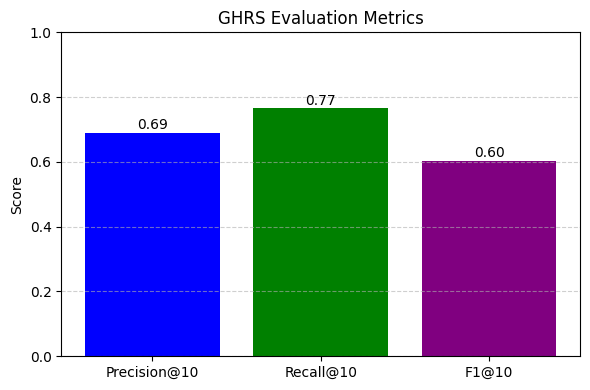

In [291]:
import matplotlib.pyplot as plt

# Data
metrics = ['Precision@10', 'Recall@10', 'F1@10']
scores = [avg_precision, avg_recall, avg_f1]

# Plot
plt.figure(figsize=(6, 4))
bars = plt.bar(metrics, scores, color=['blue', 'green', 'purple'])

# Add value labels on top
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.01, f'{yval:.2f}', ha='center', fontsize=10)

plt.title('GHRS Evaluation Metrics')
plt.ylim(0, 1)
plt.ylabel('Score')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [292]:
# Reverse the column renaming operations

# Reverse for df_user if it has 'userId' column
if 'userId' in df_user.columns:
    df_user = df_user.rename(columns={'userId': 'UID'})

# Reverse for df_clustered if it has 'userId' or 'movieId' columns
if 'userId' in df_clustered.columns or 'movieId' in df_clustered.columns:
    df_clustered = df_clustered.rename(columns={'userId': 'UID', 'movieId': 'MID'})

# Verify the changes
print("df_user columns:", df_user.columns.tolist())
print("df_clustered columns:", df_clustered.columns.tolist())

df_user columns: ['UID', 'age1', 'age2', 'age3', 'age4', 'age5', 'age6', 'gender1', 'gender2', 'job1', 'job2', 'job3', 'job4', 'job5', 'job6', 'job7', 'job8', 'job9', 'job10', 'job11', 'job12', 'job13', 'job14', 'job15', 'job16', 'job17', 'job18', 'job19', 'job20', 'job21', 'PR', 'CD', 'CC', 'CB', 'LC', 'AND', 'cluster']
df_clustered columns: ['UID', 'MID', 'rate', 'time', 'cluster']


## export

In [293]:
import joblib

# Save encoder
encoder.save('ghrs_encoder.h5')

# Save user cluster assignments
df_user[['UID', 'cluster']].to_pickle('user_clusters.pkl')

# Also save user embeddings if needed
np.save('user_embeddings.npy', user_embeddings)


c:\anaconda3\envs\info6105\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# Content-Based Filtering (CBF)

In [294]:
movies_df['genres'].apply(type).value_counts()


genres
<class 'str'>    9742
Name: count, dtype: int64

In [295]:
genre_cols = [
    'Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime',
    'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'IMAX',
    'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'Unknown',
    'War', 'Western'
]

genre_matrix = movies_df[genre_cols].values


In [296]:
from sklearn.metrics.pairwise import cosine_similarity

cosine_sim = cosine_similarity(genre_matrix)


In [297]:
movie_id_to_index = {movie_id: idx for idx, movie_id in enumerate(movies_df['movieId'])}
index_to_movie_id = {idx: movie_id for movie_id, idx in movie_id_to_index.items()}


In [298]:
user_item_matrix = user_movie_matrix.to_dict(orient='index')


In [299]:
def recommend_content_based(user_id, top_n=10, train_df=None):
    if user_id not in user_item_matrix:
        return []

    user_ratings = user_item_matrix[user_id]
    liked_movie_ids = [mid for mid, rating in user_ratings.items() if rating >= 4]

    if not liked_movie_ids:
        return []

    liked_indices = [movie_id_to_index[mid] for mid in liked_movie_ids if mid in movie_id_to_index]
    if not liked_indices:
        return []

    # Compute mean similarity across liked movies
    user_sim_scores = cosine_sim[liked_indices].mean(axis=0)

    # Sort by similarity
    recommended_indices = user_sim_scores.argsort()[::-1]

    # Build exclusion list from training set
    train_rated = set()
    if train_df is not None:
        train_rated = set(train_df[train_df['userId'] == user_id]['movieId'])

    # Recommend only unseen (in training) movies
    recs = []
    for idx in recommended_indices:
        mid = index_to_movie_id[idx]
        if mid not in train_rated:
            recs.append((mid, user_sim_scores[idx]))
        if len(recs) >= top_n:
            break

    # Attach metadata
    results = []
    for mid, score in recs:
        info = movie_info.get(mid, {'title': 'Unknown', 'genres': []})
        results.append({
            'movie_id': mid,
            'title': info['title'],
            'genres': info['genres'],
            'similarity_score': round(score, 4)
        })

    return results


In [300]:
def evaluate_recommender(recommend_func, test_df, k=10):
    from collections import defaultdict
    from sklearn.metrics import precision_score, recall_score, f1_score

    # Build ground truth from test set
    actual = defaultdict(set)
    for _, row in test_df.iterrows():
        if row['rating'] >= 4:  # assume 4+ = relevant
            actual[row['userId']].add(row['movieId'])

    precision_list, recall_list, f1_list = [], [], []

    for user_id in actual:
        recs = recommend_func(user_id, top_n=k)
        predicted = {rec['movie_id'] for rec in recs}

        if not predicted:
            continue

        true_positives = len(actual[user_id] & predicted)
        precision = true_positives / len(predicted)
        recall = true_positives / len(actual[user_id])
        f1 = 2 * precision * recall / (precision + recall + 1e-8)

        precision_list.append(precision)
        recall_list.append(recall)
        f1_list.append(f1)

    # Aggregate results
    return {
        'Precision@K': round(sum(precision_list) / len(precision_list), 4),
        'Recall@K': round(sum(recall_list) / len(recall_list), 4),
        'F1@K': round(sum(f1_list) / len(f1_list), 4),
        'Users Tested': len(precision_list)
    }


In [301]:
evaluate_recommender(lambda u, top_n=10: recommend_content_based(u, top_n, train_df), test_df, k=10)


{'Precision@K': 0.0061, 'Recall@K': 0.0064, 'F1@K': 0.005, 'Users Tested': 595}

# Popularity-Based Recommender

In [302]:
# Calculate average rating and count per movie
popularity_df = ratings_df.groupby('movieId').agg(
    avg_rating=('rating', 'mean'),
    rating_count=('rating', 'count')
).reset_index()

# Sort by popularity (avg_rating × log(count)) — balances quality & volume
import numpy as np
popularity_df['score'] = popularity_df['avg_rating'] * np.log1p(popularity_df['rating_count'])
popularity_df = popularity_df.sort_values(by='score', ascending=False)


In [303]:
def recommend_popular(user_id=None, top_n=10, train_df=None):
    # Filter out movies the user has already rated in train set (if provided)
    seen = set()
    if train_df is not None and user_id is not None:
        seen = set(train_df[train_df['userId'] == user_id]['movieId'])

    results = []
    for _, row in popularity_df.iterrows():
        mid = row['movieId']
        if mid not in seen:
            info = movie_info.get(mid, {'title': 'Unknown', 'genres': []})
            results.append({
                'movie_id': mid,
                'title': info['title'],
                'genres': info['genres'],
                'popularity_score': round(row['score'], 3)
            })
        if len(results) >= top_n:
            break
    return results


In [304]:
evaluate_recommender(lambda u, top_n=10: recommend_popular(u, top_n, train_df), test_df, k=10)


{'Precision@K': 0.1272,
 'Recall@K': 0.1021,
 'F1@K': 0.0903,
 'Users Tested': 595}

# RNN 

(I tried, but it took too much time to process, so I decided to abandon that approach and proceed with Item-Item Collaborative Filtering instead.)

In [305]:
# import pandas as pd
# from sklearn.model_selection import train_test_split

# # Example: Create sequences of user interactions
# user_sequences = ratings_df.groupby('userId')['movieId'].apply(list)

# # Split into train and test sets
# train_sequences, test_sequences = train_test_split(user_sequences, test_size=0.2, random_state=42)

In [306]:
# from sklearn.preprocessing import LabelEncoder

# # Encode movie IDs
# movie_encoder = LabelEncoder()
# all_movies = ratings_df['movieId'].unique()
# movie_encoder.fit(all_movies)

# # Encode sequences
# train_sequences = train_sequences.apply(lambda seq: movie_encoder.transform(seq))
# test_sequences = test_sequences.apply(lambda seq: movie_encoder.transform(seq))

In [307]:
# import tensorflow as tf
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense

# # Parameters
# num_movies = len(movie_encoder.classes_)
# embedding_dim = 50

# # Build the RNN model
# model = Sequential([
#     Embedding(input_dim=num_movies, output_dim=embedding_dim, input_length=None),
#     LSTM(128, return_sequences=False),
#     Dense(num_movies, activation='softmax')  # Predict the next movie
# ])

# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# model.summary()

In [308]:
# import numpy as np

# def create_rnn_data(sequences):
#     X, y = [], []
#     for seq in sequences:
#         for i in range(1, len(seq)):
#             X.append(seq[:i])  # Input: sequence up to the i-th movie
#             y.append(seq[i])  # Output: the next movie
#     return X, y

# # Prepare training data
# X_train, y_train = create_rnn_data(train_sequences)
# X_train = tf.keras.preprocessing.sequence.pad_sequences(X_train, padding='pre')  # Pad sequences
# y_train = np.array(y_train)

In [309]:
# model.fit(X_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

In [310]:
# def recommend_next_movie(user_sequence, top_n=5):
#     encoded_sequence = movie_encoder.transform(user_sequence)
#     padded_sequence = tf.keras.preprocessing.sequence.pad_sequences([encoded_sequence], padding='pre')
#     predictions = model.predict(padded_sequence)
#     top_movies = predictions[0].argsort()[-top_n:][::-1]
#     return movie_encoder.inverse_transform(top_movies)

# # Example: Recommend the next movie for a user
# user_sequence = [1, 47, 50]  # Example movie IDs
# recommended_movies = recommend_next_movie(user_sequence)
# print("Recommended Movies:", recommended_movies)